# Empirical Asset Pricing A 2021
## Homework 2: on empirical tests for asset pricing models 
**Xinyu Liu, INSEAD**

**20.01.2021**

## Overview

The goal of this exercise is to get familiar with the common practice used to test classical FF 3-factor asset pricing model. Both time series and cross-sectional tests are implemented.

## Preparation: Import packages and access data


In [1]:
import pandas_datareader.data as web  # module for reading datasets directly from the web
#pip install pandas-datareader (in case you haven't install this package)
from pandas_datareader.famafrench import get_available_datasets
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import statsmodels.api as sm
import scipy as sp
from dateutil.relativedelta import relativedelta
# print latex 
# from IPython.display import display, Math

In [2]:
###########################
# Fama French Factor Grabber
###########################
#https://randlow.github.io/posts/finance-economics/pandas-datareader-KF/
#Please refer to this link if you have any further questions.

#You can extract all the available datasets from Ken French's website and find that there are 297 of them. We can opt to see all the datasets available.
datasets = get_available_datasets()
print('No. of datasets:{}'.format(len(datasets)))
#datasets # comment out if you want to see all the datasets

No. of datasets:297


In [3]:
###########################
#Customize your data selection
###########################
#It is important to check the description of the dataset we access by using the following codes 
sdate='1997-03-01'
edate='2017-02-27'

#### For $M kt-Rf, SMB, HML$ Factors:

In [26]:
Datatoread='F-F_Research_Data_Factors'
ds_factors = web.DataReader(Datatoread,'famafrench',start=sdate,end=edate) # Taking [0] as extracting 1F-F-Research_Data_Factors_2x3')
print('\nKEYS\n{}'.format(ds_factors.keys()))
print('DATASET DESCRIPTION \n {}'.format(ds_factors['DESCR']))
#From the printed information we know that we need to select the "0" name in the dictionary
#copy the right dict for later examination
dfFactor = ds_factors[0].copy()
dfFactor.reset_index(inplace=True)

#Date format adjustment
# dfFactor['Date']=dfFactor['Date'].dt.strftime('%Y-%m')
dfFactor = dfFactor.set_index(['Date'])
# dfFactor['Date']=dfFactor['Date'].dt.to_timestamp(freq='M').dt.strftime('%Y-%m')
#Obtained object dtype
# dfFactor.index=pd.to_datetime(dfFactor.index)
#Obtained dt64, which is needed for the plotting

RF = dfFactor['RF']
dfFactor=dfFactor.drop(columns = ['RF'])
# I check the scale of the data by printing out the head:
dfFactor.head()


KEYS
dict_keys([0, 1, 'DESCR'])
DATASET DESCRIPTION 
 F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202011 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2020 Kenneth R. French

  0 : (240 rows x 4 cols)
  1 : Annual Factors: January-December (21 rows x 4 cols)


,Mkt-RF,SMB,HML
Date,,,
1997-03,-5.02,-0.40,3.43
1997-04,4.04,-5.72,0.02
1997-05,6.74,5.13,-4.08
1997-06,4.10,1.20,1.54
1997-07,7.33,-2.73,0.32


#### For 25 portfolios formed on size and book-to-market (5 x 5)

In [27]:
# I searched for the exact name for this portfolio set by methods mentioned above
#It is important to check the description of the dataset we access by using the following codes 
Datatoread_PORT='25_Portfolios_5x5'
ds_PORT = web.DataReader(Datatoread_PORT,'famafrench',start=sdate,end=edate) # Taking [0] as extracting 1F-F-Research_Data_Factors_2x3')
print('\nKEYS\n{}'.format(ds_PORT.keys()))
print('DATASET DESCRIPTION \n {}'.format(ds_PORT['DESCR']))
#From the printed information we know that we need to select the "0" name in the dictionary
#copy the right dict for later examination
dfPORT = ds_PORT[0].copy()
dfPORT.reset_index(inplace=True)

dfPORT = dfPORT.set_index(['Date'])
# I check the scale of the data by printing out the head:
dfPORT.head()


KEYS
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'DESCR'])
DATASET DESCRIPTION 
 25 Portfolios 5x5
-----------------

This file was created by CMPT_ME_BEME_OP_INV_RETS using the 202011 CRSP database. It contains value- and equal-weighted returns for portfolios formed on ME and BEME. The portfolios are constructed at the end of June. BEME is book value at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. Annual returns are from January to December. Missing data are indicated by -99.99 or -999. The break points include utilities and include financials. The portfolios include utilities and include financials. Copyright 2020 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (240 rows x 25 cols)
  1 : Average Equal Weighted Returns -- Monthly (240 rows x 25 cols)
  2 : Average Value Weighted Returns -- Annual (21 rows x 25 cols)
  3 : Average Equal Weighted Returns -- Annual (21 rows x 25 cols)
  4 : Number of Firms in

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1997-03,-9.5571,-6.2506,-4.1638,-2.5241,-2.0331,-9.4164,-5.9148,-2.5949,-2.6996,-1.2267,...,-7.5721,-3.7302,-3.2883,-4.2186,-4.2483,-5.4948,-0.7544,-4.0491,-5.6919,-5.4653
1997-04,-5.5245,-3.9653,-2.9928,-1.3204,-2.5309,-4.3127,-0.5680,-0.2195,2.4584,0.0328,...,2.3790,1.9537,2.4693,2.9962,2.3025,7.9282,2.5128,6.2054,4.9788,1.3183
1997-05,12.4713,11.6203,11.1671,8.7474,7.9860,17.3636,14.5311,9.6829,9.0683,8.8497,...,9.3678,7.9403,5.5887,7.3558,7.0606,6.1401,7.1726,5.8358,4.6531,6.5676
1997-06,3.8682,4.9742,5.6008,7.3648,7.2844,2.4361,5.6073,6.1526,5.4288,6.6818,...,2.3165,3.8946,4.9220,2.8012,4.5672,4.6683,2.5622,4.9954,4.6252,3.9963
1997-07,3.6144,5.1517,6.4789,6.2138,5.6961,5.4642,5.1498,3.5783,5.3379,5.4342,...,6.5079,7.0878,6.5944,7.8243,5.6208,7.4330,9.0625,10.7894,6.4438,8.1751


#### For 10 portfolios formed on momentum

In [28]:
Datatoread_MOM='10_Portfolios_Prior_12_2'
ds_MOM = web.DataReader(Datatoread_MOM,'famafrench',start=sdate,end=edate) # Taking [0] as extracting 1F-F-Research_Data_Factors_2x3')
print('\nKEYS\n{}'.format(ds_MOM.keys()))
print('DATASET DESCRIPTION \n {}'.format(ds_MOM['DESCR']))
dfMOM = ds_MOM[0].copy()
dfMOM.reset_index(inplace=True)

dfMOM = dfMOM.set_index(['Date'])
# I check the scale of the data by printing out the head:
dfMOM.head()


KEYS
dict_keys([0, 1, 2, 3, 4, 5, 6, 'DESCR'])
DATASET DESCRIPTION 
 10 Portfolios Prior 12 2
------------------------

This file was created by CMPT_PRIOR_RETS using the 202011 CRSP database. It contains value- and equal-weighted returns for 10 prior-return portfolios. The portfolios are constructed monthly. PRIOR_RET is from -12 to - 2. The annual returns are from January to December. Missing data are indicated by -99.99 or -999.

  0 : Average Value Weighted Returns -- Monthly (240 rows x 10 cols)
  1 : Average Equal Weighted Returns -- Monthly (240 rows x 10 cols)
  2 : Average Value Weighted Returns -- Annual (21 rows x 10 cols)
  3 : Average Equal Weighted Returns -- Annual (21 rows x 10 cols)
  4 : Number of Firms in Portfolios (240 rows x 10 cols)
  5 : Average Firm Size (240 rows x 10 cols)
  6 : Value-Weighted Average of Prior Returns (21 rows x 10 cols)


,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
Date,,,,,,,,,,
1997-03,-7.83,-4.16,-3.63,-5.28,-2.81,-2.60,-4.99,-3.43,-6.39,-4.43
1997-04,-2.87,1.56,-0.24,1.49,2.66,2.86,5.93,6.93,6.93,8.97
1997-05,17.49,12.34,10.87,6.40,5.48,7.13,5.80,7.24,5.34,6.13
1997-06,1.45,1.79,6.07,3.67,3.07,3.62,3.89,4.36,5.93,4.51
1997-07,4.12,4.60,5.28,7.65,4.49,8.30,5.77,6.71,7.47,15.24


## Test functions 
#### Define the function for conducting time series test

In [48]:
def Time_Series_Test(factor_matrix, test_assets, RF):
    X = sm.add_constant(factor_matrix)
    const_value = list()
    t_value = list()
    rsquared_adj_value = list()
    risidual_matrix = pd.DataFrame()
    # Loop to perform regression
    # Note that we should deduct RF from the portfolio return to get the excess return
    for i in range(len(test_assets.columns)):
        y= test_assets.iloc[:,i]-RF
        model = sm.OLS(y, X)
        results = model.fit()
        const_value.append(results.params[0])
        t_value.append(results.tvalues[0])
        rsquared_adj_value.append(results.rsquared_adj)
        if i == 0:
            risidual_matrix = pd.DataFrame(results.resid,columns=[i])
        else:
            risidual_matrix=risidual_matrix.join(pd.DataFrame(results.resid,columns=[i]))
    # convert result into dataframe
    ts_result = {'intercept': const_value, 't-stats': t_value, 'R^2-adj': rsquared_adj_value, 'test_assets_name': test_assets.columns}
    ts_result = pd.DataFrame.from_dict(ts_result, orient='index')
    ts_result.columns = ts_result.loc['test_assets_name',:]
    ts_result = ts_result.drop(['test_assets_name'])
    del ts_result.columns.name
    
    # Compute GRS test statistics
    T = len(test_assets.index)
    N = len(test_assets.columns)
    mu_mkt = factor_matrix['Mkt-RF'].mean()
    sigma_mkt = factor_matrix['Mkt-RF'].std()
    alpha = ts_result.T['intercept']
    GRS_sigma = (risidual_matrix.T @ risidual_matrix)/T
    GRS_sigma = np.matrix(GRS_sigma)
    GRS_sigma = np.linalg.inv(GRS_sigma)
    GRS_sigma_inv = pd.DataFrame(GRS_sigma)
    ## Key formula to calculate the statistics
    J_1 = (T-N-1)/N*(1+(mu_mkt/sigma_mkt)**2)**(-1)*np.dot(np.dot(alpha.T,GRS_sigma_inv),alpha)
    
    # Test procedure
    df1 = N
    df2 = T-N-1
    p_value = 1 - sp.stats.f.cdf(J_1, df1, df2)
    print('The GRS test statistic J_1 is {:2.2f}, and its p-value is {:2.6f}'.format(J_1, p_value))
    ts_result=ts_result.astype(float).round(2)
    print(ts_result.to_latex())
    return ts_result, np.round(J_1, 3), np.round(p_value, 3)

In [49]:
ts_result, J_1, p_value= Time_Series_Test(dfFactor, dfMOM, RF)

The GRS test statistic J_1 is 1.77, and its p-value is 0.067611
\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Lo PRIOR &  PRIOR 2 &  PRIOR 3 &  PRIOR 4 &  PRIOR 5 &  PRIOR 6 &  PRIOR 7 &  PRIOR 8 &  PRIOR 9 &  Hi PRIOR \\
\midrule
intercept &     -0.89 &    -0.35 &    -0.14 &     0.08 &     0.10 &     0.02 &     0.11 &     0.20 &     0.07 &      0.37 \\
t-stats   &     -2.17 &    -1.43 &    -0.71 &     0.56 &     0.79 &     0.19 &     0.89 &     1.70 &     0.49 &      1.68 \\
R\textasciicircum 2-adj   &      0.62 &     0.72 &     0.73 &     0.80 &     0.83 &     0.82 &     0.80 &     0.82 &     0.77 &      0.72 \\
\bottomrule
\end{tabular}



In [50]:
ts_result, J_1, p_value= Time_Series_Test(dfFactor, dfPORT, RF)

The GRS test statistic J_1 is 3.20, and its p-value is 0.000002
\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &  SMALL LoBM &  ME1 BM2 &  ME1 BM3 &  ME1 BM4 &  SMALL HiBM &  ME2 BM1 &  ME2 BM2 &  ME2 BM3 &  ME2 BM4 &  ME2 BM5 &  ME3 BM1 &  ME3 BM2 &  ME3 BM3 &  ME3 BM4 &  ME3 BM5 &  ME4 BM1 &  ME4 BM2 &  ME4 BM3 &  ME4 BM4 &  ME4 BM5 &  BIG LoBM &  ME5 BM2 &  ME5 BM3 &  ME5 BM4 &  BIG HiBM \\
\midrule
intercept &       -0.59 &     0.04 &     0.00 &     0.31 &        0.18 &    -0.17 &     0.10 &     0.11 &     0.05 &    -0.11 &    -0.07 &     0.13 &     0.11 &     0.10 &     0.14 &     0.16 &     0.15 &     0.03 &     0.19 &    -0.11 &      0.15 &     0.07 &     0.14 &    -0.35 &     -0.30 \\
t-stats   &       -3.08 &     0.27 &     0.02 &     3.16 &        1.82 &    -1.39 &     0.93 &     0.97 &     0.52 &    -1.28 &    -0.66 &     1.09 &     0.91 &     0.82 &     0.92 &     1.43 &     1.19 &     0.20 &     1.43 &    -0.69 &      2.85 &     0.75 &     1.21 &    -2.84 &     -1

In [51]:
# Make the output table more readable
for content in ts_result.index:
    print_report = pd.DataFrame(ts_result.loc[content,:].values.reshape(5,5),columns= ["BM" + str(i+1) for i in range(5)], index= ["ME" + str(i+1) for i in range(5)])
    print_report = pd.concat([print_report], axis=1, keys=[content])
    print(print_report.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{5}{l}{intercept} \\
{} &       BM1 &   BM2 &   BM3 &   BM4 &   BM5 \\
\midrule
ME1 &     -0.59 &  0.04 &  0.00 &  0.31 &  0.18 \\
ME2 &     -0.17 &  0.10 &  0.11 &  0.05 & -0.11 \\
ME3 &     -0.07 &  0.13 &  0.11 &  0.10 &  0.14 \\
ME4 &      0.16 &  0.15 &  0.03 &  0.19 & -0.11 \\
ME5 &      0.15 &  0.07 &  0.14 & -0.35 & -0.30 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{5}{l}{t-stats} \\
{} &     BM1 &   BM2 &   BM3 &   BM4 &   BM5 \\
\midrule
ME1 &   -3.08 &  0.27 &  0.02 &  3.16 &  1.82 \\
ME2 &   -1.39 &  0.93 &  0.97 &  0.52 & -1.28 \\
ME3 &   -0.66 &  1.09 &  0.91 &  0.82 &  0.92 \\
ME4 &    1.43 &  1.19 &  0.20 &  1.43 & -0.69 \\
ME5 &    2.85 &  0.75 &  1.21 & -2.84 & -1.41 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{5}{l}{R\textasciicircum 2-adj} \\
{} &     BM1 &   BM2 &   BM3 &   BM4 &   BM5 \\
\midrule
ME1 &    0.89 &  0.91 &  0.94 &  0.93 &  0.94 \\

## Plot for building up intuitions

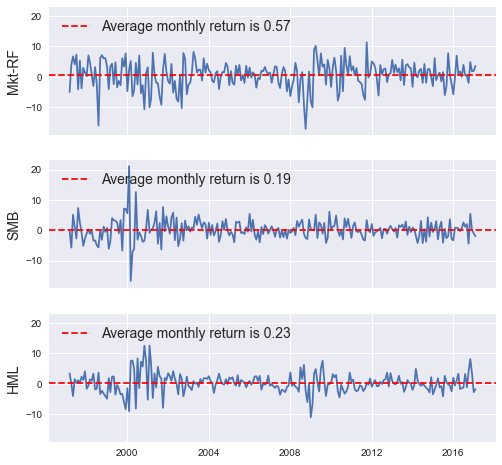

In [12]:
###########################
#Plot out the graphs
###########################
#See this link for detailed guidance on date ticks
# https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html
# I am troubled by adjusting the format and making subplots for the whole evening and it turns out that things can be simplified in the following way:
years_fmt = mdates.DateFormatter('%Y')
#This will be used as input to adjust the axis label to be in the unit of year
n = len(dfFactor.columns)
fig, axes = plt.subplots(n,1,figsize=(8,8),sharex=True,sharey=True)
#Using sharex help making the plot simple and easy to read
# Create fig and axes class so I can then process with them in the for loop.
# fig.suptitle('Time series of relevant variables',fontsize=16)
for k,factortitle in enumerate(dfFactor.columns):
    ax = axes[k]
#     ax.set_xticks(dfFactor.index)
    ax.plot(dfFactor.index.to_timestamp(),dfFactor[factortitle])
    ax.axhline(y=dfFactor[factortitle].mean(),color='r', linestyle='--',label='Average monthly return is {:.2f}'.format(dfFactor[factortitle].mean()))
    ax.xaxis.set_major_formatter(years_fmt)
    ax.set_ylabel(factortitle,fontsize = 14)
    ax.legend(fontsize = 14,loc=2)
plt.savefig("Time series of momnthly factor returns")
plt.show()

In [56]:
print(dfFactor.corr().round(2).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Mkt-RF &   SMB &   HML \\
\midrule
Mkt-RF &    1.00 &  0.24 & -0.15 \\
SMB    &    0.24 &  1.00 & -0.28 \\
HML    &   -0.15 & -0.28 &  1.00 \\
\bottomrule
\end{tabular}



#### Define a function to plot aggregate gross returns of factor mimicking portfolios and testing portfolios

In [15]:
def portfolio_plot(df, num_subplot, plot_name='testing' ,figsize=(8,8), cmap ='twilight'):
    n = num_subplot
    fig, axes = plt.subplots(n,1,figsize=figsize,sharex=True,sharey=True)

    # fig.suptitle('Time series of relevant variables',fontsize=16)
    # Add an origin point at the top of the dataframe
    dfcopy = df.copy()
    dfcopy.index = dfcopy.index.to_timestamp()
    origin = dfcopy.index[0]-relativedelta(months=1)
    dfcopy.loc[origin,:] = [1]*len(dfcopy.columns)
    dfcopy=dfcopy.sort_index()

    dfFactor_cum = (dfcopy/100+1).cumprod()
    for k,factortitle in enumerate(dfcopy.columns):
        if n==1:
            ax = axes
        else:
            ax = axes[k//n]
        ax.plot(dfFactor_cum.index,dfFactor_cum[factortitle], label='{}: {:.2f}'.format(factortitle, dfFactor_cum[factortitle][-1]))
        ax.xaxis.set_major_formatter(years_fmt)
        colormap = plt.cm.get_cmap(cmap)   
        colors = [colormap(i) for i in np.linspace(0.1, 0.5,len(ax.lines))]
        for i,j in enumerate(ax.lines):
            j.set_color(colors[i])
        ax.legend(fontsize = 10,loc=2)
    fig.text(0.04, 0.5, 'Aggregate returns for ' +plot_name+' portfolios', va='center', ha='center',rotation='vertical',fontsize = 14)
    plt.savefig("Time series of "+plot_name)
    plt.show()

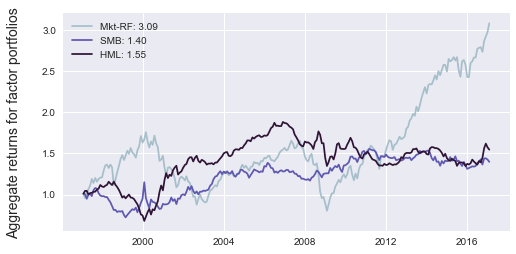

In [16]:
portfolio_plot(dfFactor, 1, plot_name='factor' ,figsize=(8,4), cmap ='twilight')

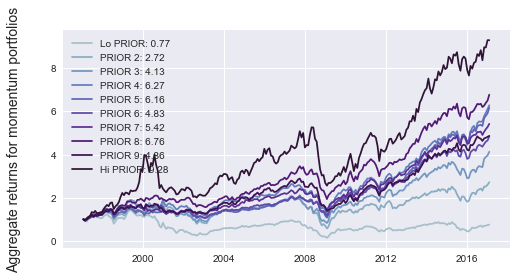

In [17]:
portfolio_plot(dfMOM, 1, plot_name='momentum' ,figsize=(8,4), cmap ='twilight')

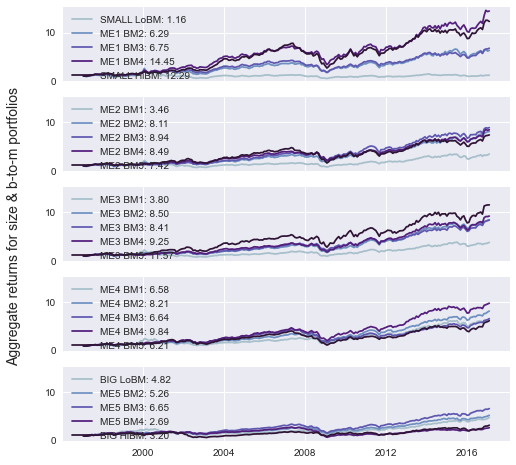

In [18]:
portfolio_plot(dfPORT, 5, plot_name="size & b-to-m" ,figsize=(8,8), cmap ='twilight')